# BIKE SHARING ASSIGNMENT 
###### Sivaraman Saptharishi (Siva)

To generate a model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state

BoomBikers want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1) Which variables are significant in predicting the demand for shared bikes.
2) How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# DataSet Analysis

The dataset that is provided is called day.csv, lets start understanding the data with few  techniques 
before start building a model

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading and Understanding Data

In [2]:
# Read the dataset (day.csv) present in the same path.
DayData = pd.read_csv("./day.csv",low_memory=False)
DayData.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Fetch Rows & Columns

In [3]:
def Fetch_Number_of_Columns(DataSet):
    Number_of_Columns = len(DataSet.columns)
    return Number_of_Columns 

def Fetch_Number_of_Rows(DataSet):
    Number_of_rows = len(DataSet.index)
    return Number_of_rows

In [4]:
# Get the number of Rows & Columns in the Dataset
print("Number of Columns in the dataset : {Num_Cols}".format(Num_Cols = Fetch_Number_of_Columns(DayData)))
print("Number of Rows in the dataset : {Num_Rows}".format(Num_Rows = Fetch_Number_of_Rows(DayData)))

Number of Columns in the dataset : 16
Number of Rows in the dataset : 730


### Null Value Analysis

In [5]:
def GetNullValue_IndividualCol(DataSet):
     return(DataSet.isnull().sum())

def Get_Null_Value(Data):
    return(Data.sum())

In [6]:
# Total Number of Null Values in the DataSet
Ind_Col_Null_Values = GetNullValue_IndividualCol(DayData)
Tot_percent_null_values = Get_Null_Value(Ind_Col_Null_Values)
print("Number of null values in the entire dataset : {Num_Null_Values}".format(Num_Null_Values = Tot_percent_null_values))

Number of null values in the entire dataset : 0


Since there is no null values in the entire dataset, it is good to proceed with further analysis

In [7]:
# Check for duplicate
DayData_Copy = DayData.copy()
DayData_Copy.drop_duplicates(subset=None,inplace=True)

In [8]:
# Get Number of Rows and columns after checking for duplicate values
print("Number of Columns in the dataset : {Num_Cols}".format(Num_Cols = Fetch_Number_of_Columns(DayData_Copy)))
print("Number of Rows in the dataset : {Num_Rows}".format(Num_Rows = Fetch_Number_of_Rows(DayData_Copy)))

Number of Columns in the dataset : 16
Number of Rows in the dataset : 730


Both are matching and hence no duplicates are present

In [9]:
# To know about the missing values
DayData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# To get the statistical summary
DayData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Get only the column names
DayData.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Data Visualization

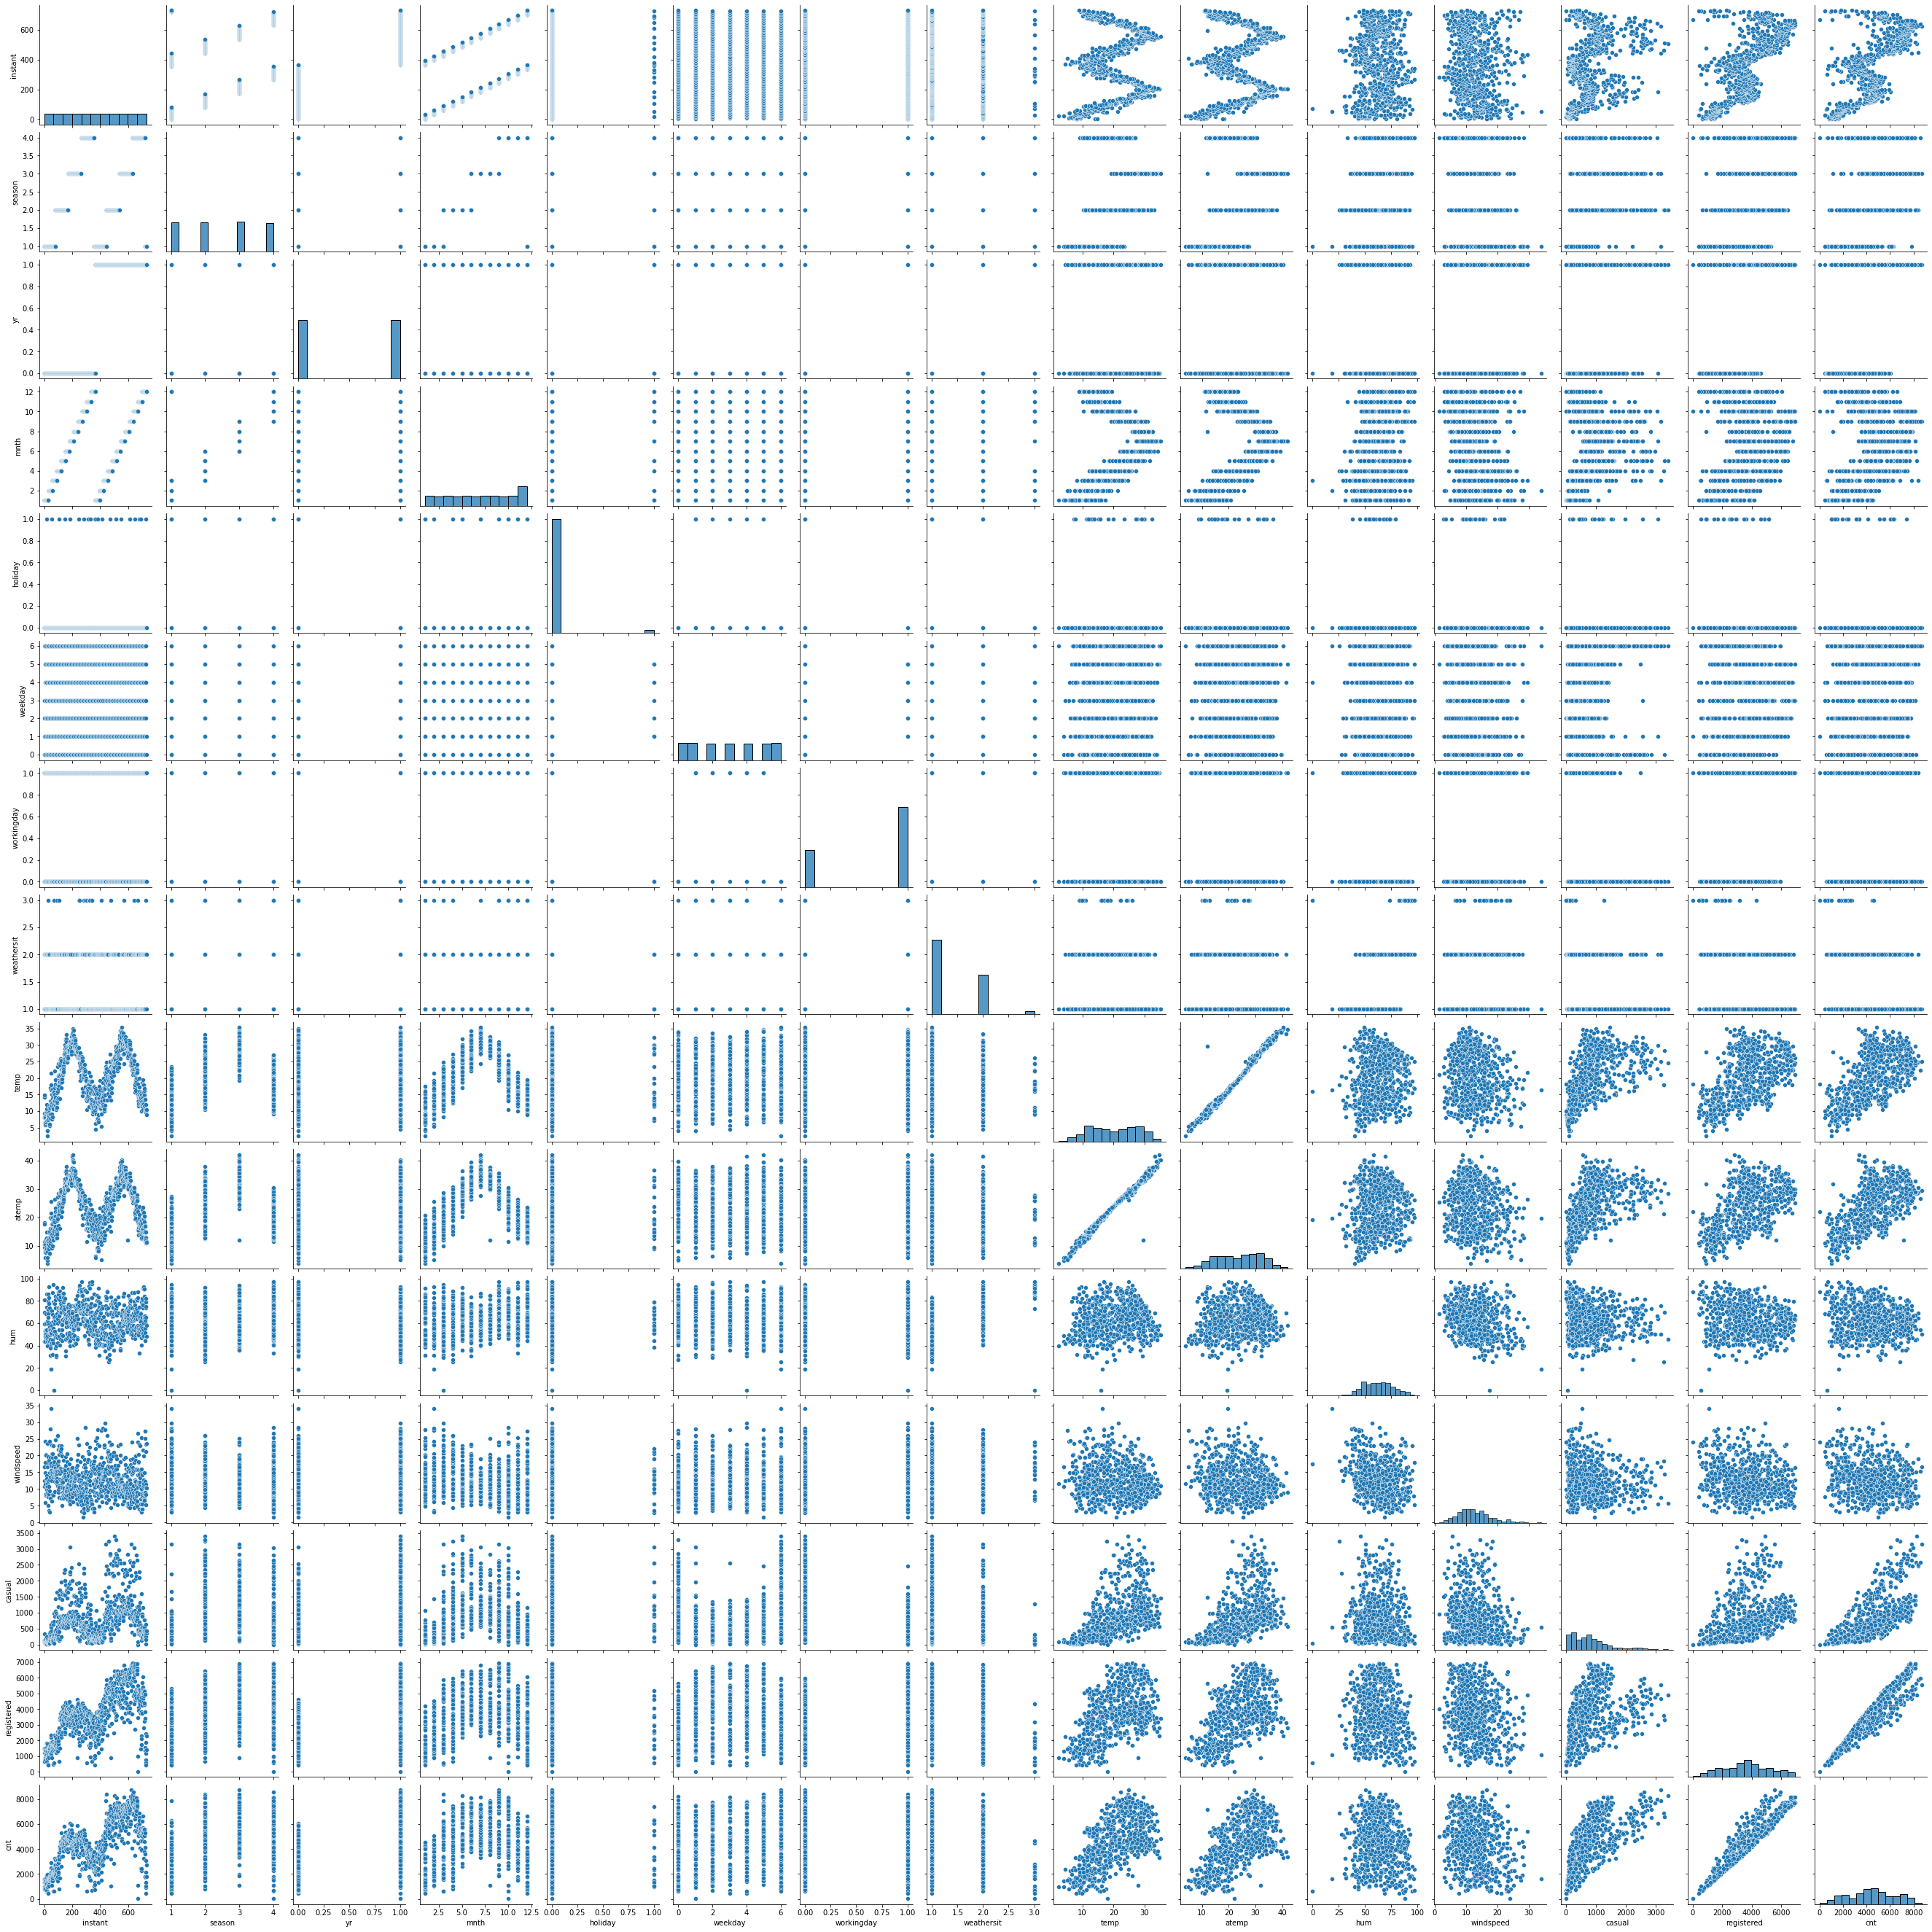

In [12]:
# Visualize variables
sns.pairplot(DayData)


From the pair plot,some of the major features that may contribute to the model building and predictions are 
1) cnt
2) registered
3) casual
4) atemp or temp
5) casual
6) Holiday
7) Season

In [13]:
# Since there more variable to visualize, we can further divide it to numerical and categorical data
Bike_Data = DayData.iloc[:,1:16] # Ignore instant column which is just a index

In [14]:
Bike_Data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [15]:
# Get the number of Rows & Columns in the Dataset
print("Number of Columns in the dataset : {Num_Cols}".format(Num_Cols = Fetch_Number_of_Columns(Bike_Data)))
print("Number of Rows in the dataset : {Num_Rows}".format(Num_Rows = Fetch_Number_of_Rows(Bike_Data)))

Number of Columns in the dataset : 15
Number of Rows in the dataset : 730


In [16]:
Bike_Data_Analysis=Bike_Data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

With the help of data dictionary, the following variables can be removed from further analysis:

1) dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could proceed without this column.
2) instant : Its only an index value
3) casual & registered : Both these columns contains the count of bike  by different categories of customers. Since our goal is to find the total count of bikes and not by specific category, we will ignore these two columns. 

### Visualize categorical variable
In this dataset below are some of the variable taken for analysis
1) mnth
2) weekday 
3) season
4) weathersit
5) yr
6) holiday
7) workingday
8) temp
9) atemp
10) hum
12) cnt

season,weathersit,mnth,weekday can be taken as categorical variable.
temp,atemp along with windspeed can be taken for derived column

In [17]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [18]:
Bike_Data_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [19]:
# Convert to 'category' data type

Bike_Data_Analysis['season']=Bike_Data_Analysis['season'].astype('category')
Bike_Data_Analysis['weathersit']=Bike_Data_Analysis['weathersit'].astype('category')
Bike_Data_Analysis['mnth']=Bike_Data_Analysis['mnth'].astype('category')
Bike_Data_Analysis['weekday']=Bike_Data_Analysis['weekday'].astype('category')

In [20]:
# Creating Dummy variable 
Bike_Data_Analysis.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# Get the number of Rows & Columns in the Dataset
print("Number of Columns in the dataset : {Num_Cols}".format(Num_Cols = Fetch_Number_of_Columns(Bike_Data_Analysis)))
print("Number of Rows in the dataset : {Num_Rows}".format(Num_Rows = Fetch_Number_of_Rows(Bike_Data_Analysis)))

Number of Columns in the dataset : 12
Number of Rows in the dataset : 730


In [22]:
# To get k-1 dummies out of k categorical levels by removing the first level.
Bike_Data_Analysis = pd.get_dummies(Bike_Data_Analysis,drop_first = True)

In [23]:
Bike_Data_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [24]:
Bike_Data_Analysis.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
# Get the number of Rows & Columns in the Dataset
print("Number of Columns in the dataset : {Num_Cols}".format(Num_Cols = Fetch_Number_of_Columns(Bike_Data_Analysis)))
print("Number of Rows in the dataset : {Num_Rows}".format(Num_Rows = Fetch_Number_of_Rows(Bike_Data_Analysis)))

Number of Columns in the dataset : 30
Number of Rows in the dataset : 730


### Now we are done with Data understanding and cleaning. Now we will split it for test and train
### Split Test & Train 
### Rescale of the data

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(Bike_Data_Analysis, train_size = 0.75, test_size = 0.25, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(547, 30)
(183, 30)


## Lets us analyze the categorical variable

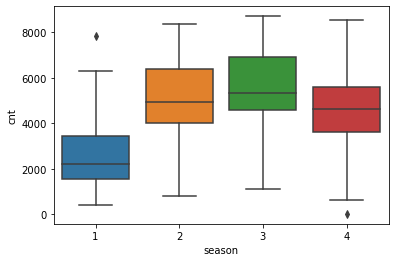

In [28]:
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Data)
plt.show()

The categorical variable season can be a good predictor where more bike booking(more than 5000 happens) in season 3, following by season 2 , season 4 and then season 1


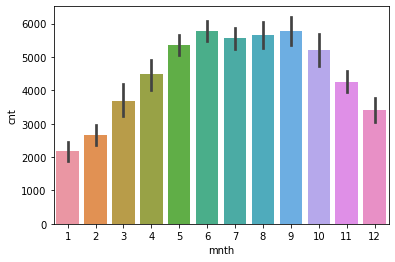

In [29]:
sns.barplot(x = 'mnth', y = 'cnt', data = Bike_Data)
plt.show()

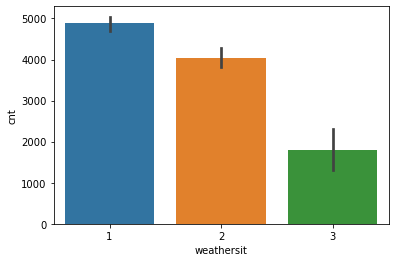

In [30]:
sns.barplot(x = 'weathersit', y = 'cnt', data = Bike_Data)
plt.show()

Nearly 70% of the bike booking were happening during ‘weathersit1. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

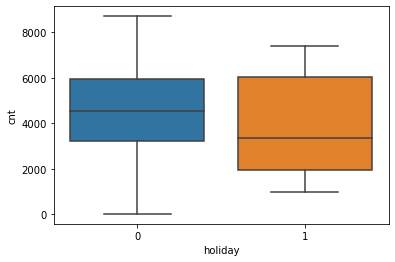

In [31]:
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Data)
plt.show()

More number of bikes are booked when it is not a holiday from median. But not sure if it is a weekday or working day. Hence this variable can be ruled out and variable weekday and workind day can be taken into account.

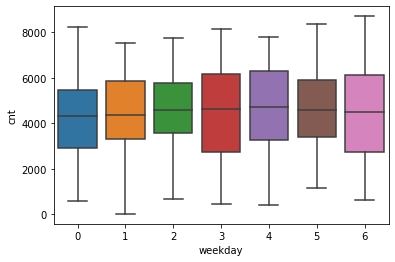

In [32]:
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Data)
plt.show()

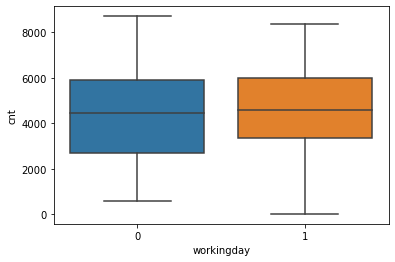

In [33]:
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Data)
plt.show()

From the categorical variable analysis following variables contribute a lot for prediction of the bike users
1) season
2) mnth
3) weathersit
4) workingday

Holiday and weekday are ruled out since, more bike users are seen when it is not a holiday. Hence it can be considered as either working day or weekday. There are possibilities where weekdays can be off and weekends can also be a working day hence, workingday will represent the holiday and weekday data.

### Rescaling the features

In [34]:
# Instantiate an object
scaler = MinMaxScaler()

In [35]:
# Before scaling create a list of Numeric variables
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [36]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars]

,temp,atemp,hum,windspeed,cnt
311,16.741653,20.61230,72.1667,4.625513,4205
523,26.615847,29.89310,46.7917,11.750661,7736
381,15.294763,18.21390,71.6087,23.391710,2935
413,14.213347,17.77125,53.4583,12.792243,4318
253,26.786653,30.46145,71.3750,7.708618,5046
...,...,...,...,...,...
578,30.852500,35.35440,65.9583,8.666718,7261
53,9.091299,12.28585,42.3043,6.305571,1917
350,10.591653,12.46855,56.0833,16.292189,2739
79,17.647835,20.48675,73.7391,19.348461,2077


In [37]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.535543,0.511400,0.650673,0.319317,0.511382
std,0.225446,0.211788,0.144515,0.169239,0.225008
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.336998,0.326287,0.538858,0.197844,0.350437
50%,0.535847,0.521862,0.655216,0.294101,0.514266
75%,0.735215,0.688457,0.753113,0.413761,0.682697
max,1.000000,1.000000,1.000000,1.000000,1.000000


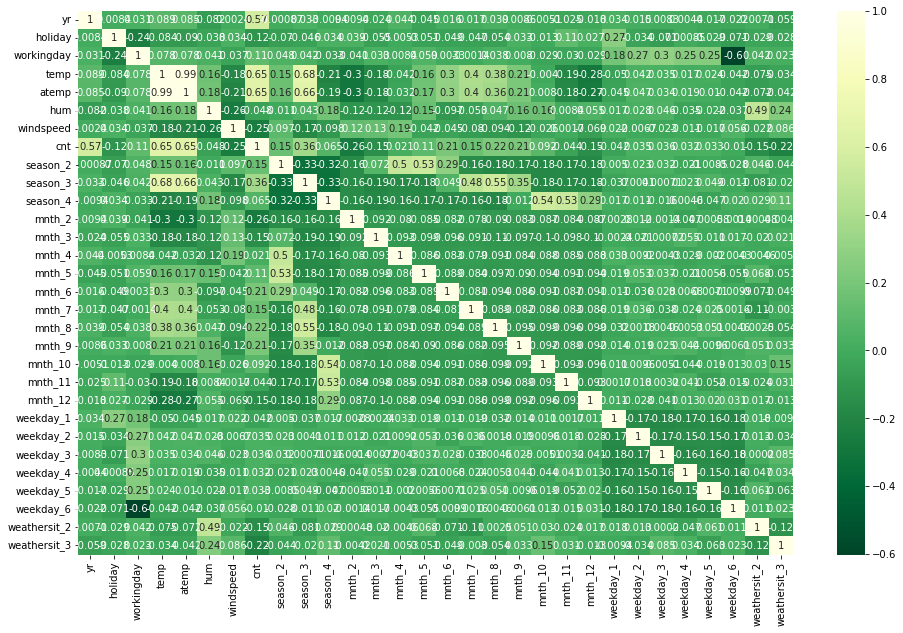

In [38]:
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot=True, cmap = 'YlGn_r')
plt.show()

In [39]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0.481247,0,0,...,1,0,0,1,0,0,0,0,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,0.887483,1,0,...,0,0,0,0,0,0,1,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0.335136,0,0,...,0,0,0,1,0,0,0,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0.494248,0,0,...,0,0,0,0,0,0,0,1,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0.578003,0,1,...,0,0,0,0,0,0,0,0,0,0


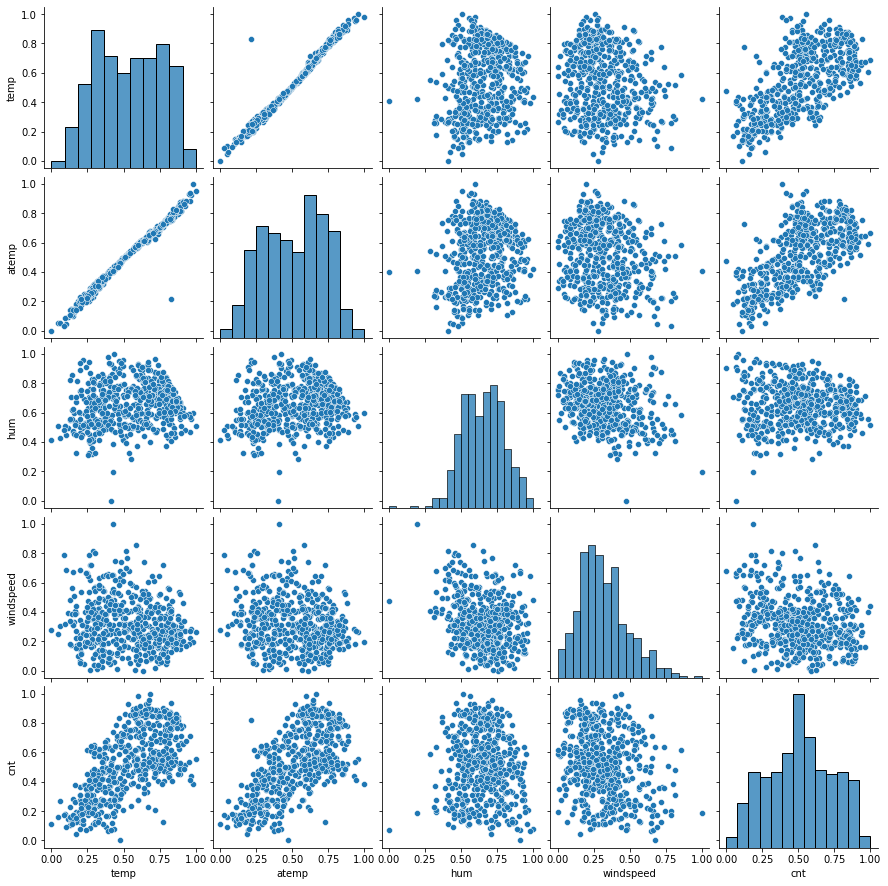

In [40]:
Bike_numerical_data = df_train[num_vars]
sns.pairplot(Bike_numerical_data)
plt.show()

Before scaling we saw that the Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'. After spliting and scaling the same corrleation exist with train data set

In [41]:
# X_train & y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [42]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
311,0,0,1,0.435124,0.437339,0.743667,0.057471,0,0,1,...,1,0,0,1,0,0,0,0,0,0
523,1,0,1,0.735215,0.680985,0.482181,0.286093,1,0,0,...,0,0,0,0,0,0,1,0,0,0
381,1,0,1,0.391151,0.374375,0.737917,0.659615,0,0,0,...,0,0,0,1,0,0,0,0,1,0
413,1,0,0,0.358285,0.362754,0.550880,0.319514,0,0,0,...,0,0,0,0,0,0,0,1,0,0
253,0,0,0,0.740406,0.695906,0.735509,0.156398,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y_train.head()

311    0.481247
523    0.887483
381    0.335136
413    0.494248
253    0.578003
Name: cnt, dtype: float64

A) numerical_vars 
1) temp
2) atemp
3) hum
4) windspeed
B) categorical_vars 
1) season
2) mnth
3) weathersit
4) workingday

In [44]:
# Now taking the most corrleated value from the coorelation table

In [45]:
import statsmodels.api as sm 

In [46]:
# Add constant
X_train_sm = sm.add_constant(X_train['temp'])

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const    0.164560
temp     0.647608
dtype: float64

In [47]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     396.3
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.11e-66
Time:                        18:52:04   Log-Likelihood:                 189.73
No. Observations:                 547   AIC:                            -375.5
Df Residuals:                     545   BIC:                            -366.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1646      0.019      8.707      0.000       0.127       0.202
temp           0.6476      0.033     19.908      0.000       0.584       0.712
==============================================================================
Omnibus:                        7.830   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                5.512
Skew:                           0.109   Prob(JB):                       0.0636
Kurtosis:                       2.560   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Significance is deicied with P value, which is 0.
### The result is statistically significant
##### R-squared is 0.424, which means that nearly 42% of the variance in bike users count is explained by atemp feature.
### Still model can be improved

In [48]:
# Add another variable windspeed
# Add constant
X_train_sm = X_train[['temp','windspeed']]
X_train_sm = sm.add_constant(X_train_sm)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const        0.235610
temp         0.623299
windspeed   -0.181738
dtype: float64

In [49]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     213.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           4.92e-69
Time:                        18:52:04   Log-Likelihood:                 198.41
No. Observations:                 547   AIC:                            -390.8
Df Residuals:                     544   BIC:                            -377.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2356      0.025      9.355      0.000       0.186       0.285
temp           0.6233      0.033     19.138      0.000       0.559       0.687
windspeed     -0.1817      0.043     -4.189      0.000      -0.267      -0.097
==============================================================================
Omnibus:                       12.390   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.437
Skew:                           0.172   Prob(JB):                       0.0147
Kurtosis:                       2.498   Cond. No.                         8.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R-squared doesnt increase much it has increased from 42 to 43%. But the windspeed is coefficient is negative
## Now we will add the variables from our variable analysis and check it

In [50]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [51]:
Bike_User_Prediction_Vars = X_train[['yr','workingday', 'temp', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3']]

In [52]:

X_train_sm = sm.add_constant(Bike_User_Prediction_Vars)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.088056
yr              0.234575
workingday      0.099535
temp            0.396906
windspeed      -0.153780
season_2        0.091240
season_3        0.053132
season_4        0.165367
mnth_2          0.032967
mnth_3          0.071768
mnth_4          0.074455
mnth_5          0.088922
mnth_6          0.095409
mnth_7          0.048227
mnth_8          0.095576
mnth_9          0.150425
mnth_10         0.069107
mnth_11         0.014949
mnth_12         0.003555
weekday_1      -0.063190
weekday_2      -0.060994
weekday_3      -0.047241
weekday_4      -0.047195
weekday_5      -0.036735
weekday_6       0.057813
weathersit_2   -0.082568
weathersit_3   -0.300154
dtype: float64

In [53]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     115.1
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          8.31e-197
Time:                        18:52:04   Log-Likelihood:                 562.66
No. Observations:                 547   AIC:                            -1071.
Df Residuals:                     520   BIC:                            -955.1
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0881      0.020      4.405      0.000       0.049       0.127
yr               0.2346      0.008     30.392      0.000       0.219       0.250
workingday       0.0995      0.025      4.013      0.000       0.051       0.148
temp             0.3969      0.043      9.323      0.000       0.313       0.481
windspeed       -0.1538      0.024     -6.424      0.000      -0.201      -0.107
season_2         0.0912      0.023      3.957      0.000       0.046       0.137
season_3         0.0531      0.029      1.848      0.065      -0.003       0.110
season_4         0.1654      0.024      6.881      0.000       0.118       0.213
mnth_2           0.0330      0.019      1.706      0.089      -0.005       0.071
mnth_3           0.0718      0.021      3.393      0.001       0.030       0.113
mnth_4           0.0745      0.032      2.307      0.021       0.011       0.138
mnth_5           0.0889      0.035      2.552      0.011       0.020       0.157
mnth_6           0.0954      0.036      2.621      0.009       0.024       0.167
mnth_7           0.0482      0.042      1.161      0.246      -0.033       0.130
mnth_8           0.0956      0.040      2.414      0.016       0.018       0.173
mnth_9           0.1504      0.035      4.245      0.000       0.081       0.220
mnth_10          0.0691      0.032      2.154      0.032       0.006       0.132
mnth_11          0.0149      0.031      0.486      0.627      -0.045       0.075
mnth_12          0.0036      0.024      0.148      0.882      -0.044       0.051
weekday_1       -0.0632      0.026     -2.470      0.014      -0.113      -0.013
weekday_2       -0.0610      0.028     -2.157      0.031      -0.117      -0.005
weekday_3       -0.0472      0.028     -1.665      0.097      -0.103       0.009
weekday_4       -0.0472      0.028     -1.678      0.094      -0.102       0.008
weekday_5       -0.0367      0.028     -1.295      0.196      -0.092       0.019
weekday_6        0.0578      0.014      4.170      0.000       0.031       0.085
weathersit_2    -0.0826      0.008    -10.045      0.000      -0.099      -0.066
weathersit_3    -0.3002      0.024    -12.417      0.000      -0.348      -0.253
==============================================================================
Omnibus:                       94.911   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.038
Skew:                          -0.835   Prob(JB):                     3.11e-60
Kurtosis:                       6.039   Cond. No.                         40.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
# Based on significance of p values we can drop variables

## Variance Inflation Factor (VIF)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
X_train_Updated = X_train[['yr','workingday', 'temp', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3']]

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_Updated.columns
vif['VIF'] = [variance_inflation_factor(X_train_Updated.values, i) for i in range(X_train_Updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,34.61
1,workingday,28.61
5,season_3,14.45
13,mnth_8,10.15
6,season_4,9.83
4,season_2,9.05
12,mnth_7,8.55
20,weekday_3,8.28
19,weekday_2,7.35
11,mnth_6,7.24


        -High p-value,high VIF (Drop)
        -High p-value low VIF  (Remove first and then recompute VIF)
        -Low P-value High VIF
        -Low p-value low VIF 


#### Variables that have High p-values and low VIF
mnth_11, mnth_12

In [58]:
X = Bike_User_Prediction_Vars.drop(['mnth_11','mnth_12'],axis = 1)

In [59]:
X_train_sm = sm.add_constant(X)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.088378
yr              0.234396
workingday      0.097943
temp            0.400230
windspeed      -0.152508
season_2        0.093454
season_3        0.057762
season_4        0.173636
mnth_2          0.031409
mnth_3          0.069159
mnth_4          0.070025
mnth_5          0.084141
mnth_6          0.089474
mnth_7          0.040385
mnth_8          0.087959
mnth_9          0.142267
mnth_10         0.058642
weekday_1      -0.062099
weekday_2      -0.059535
weekday_3      -0.045743
weekday_4      -0.045745
weekday_5      -0.035493
weekday_6       0.057514
weathersit_2   -0.082662
weathersit_3   -0.299922
dtype: float64

In [60]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     125.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          7.86e-199
Time:                        18:52:04   Log-Likelihood:                 562.48
No. Observations:                 547   AIC:                            -1075.
Df Residuals:                     522   BIC:                            -967.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0884      0.019      4.618      0.000       0.051       0.126
yr               0.2344      0.008     30.454      0.000       0.219       0.250
workingday       0.0979      0.025      3.980      0.000       0.050       0.146
temp             0.4002      0.042      9.574      0.000       0.318       0.482
windspeed       -0.1525      0.024     -6.408      0.000      -0.199      -0.106
season_2         0.0935      0.022      4.156      0.000       0.049       0.138
season_3         0.0578      0.027      2.157      0.031       0.005       0.110
season_4         0.1736      0.015     11.270      0.000       0.143       0.204
mnth_2           0.0314      0.018      1.759      0.079      -0.004       0.066
mnth_3           0.0692      0.019      3.673      0.000       0.032       0.106
mnth_4           0.0700      0.029      2.387      0.017       0.012       0.128
mnth_5           0.0841      0.032      2.655      0.008       0.022       0.146
mnth_6           0.0895      0.032      2.781      0.006       0.026       0.153
mnth_7           0.0404      0.036      1.132      0.258      -0.030       0.110
mnth_8           0.0880      0.034      2.611      0.009       0.022       0.154
mnth_9           0.1423      0.028      5.098      0.000       0.087       0.197
mnth_10          0.0586      0.018      3.308      0.001       0.024       0.093
weekday_1       -0.0621      0.025     -2.438      0.015      -0.112      -0.012
weekday_2       -0.0595      0.028     -2.117      0.035      -0.115      -0.004
weekday_3       -0.0457      0.028     -1.621      0.106      -0.101       0.010
weekday_4       -0.0457      0.028     -1.636      0.103      -0.101       0.009
weekday_5       -0.0355      0.028     -1.257      0.209      -0.091       0.020
weekday_6        0.0575      0.014      4.158      0.000       0.030       0.085
weathersit_2    -0.0827      0.008    -10.074      0.000      -0.099      -0.067
weathersit_3    -0.2999      0.024    -12.430      0.000      -0.347      -0.253
==============================================================================
Omnibus:                       93.493   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.083
Skew:                          -0.825   Prob(JB):                     6.12e-59
Kurtosis:                       6.006   Cond. No.                         33.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X_train_Updated_1 = X_train[['yr','workingday', 'temp', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
        'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3']]

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_Updated.columns
vif['VIF'] = [variance_inflation_factor(X_train_Updated.values, i) for i in range(X_train_Updated.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,34.61
1,workingday,28.61
5,season_3,14.45
13,mnth_8,10.15
6,season_4,9.83
4,season_2,9.05
12,mnth_7,8.55
20,weekday_3,8.28
19,weekday_2,7.35
11,mnth_6,7.24


### No significant change in R-squared value

## Now remove variables with high p-values and less VIF

In [63]:
X_Drop_2 = X.drop(['mnth_7'],axis=1)

In [64]:
X_train_sm = sm.add_constant(X_Drop_2)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.084424
yr              0.234052
workingday      0.100799
temp            0.426719
windspeed      -0.152776
season_2        0.101465
season_3        0.073508
season_4        0.170492
mnth_2          0.028326
mnth_3          0.060229
mnth_4          0.053466
mnth_5          0.063379
mnth_6          0.063187
mnth_8          0.055546
mnth_9          0.117153
mnth_10         0.052357
weekday_1      -0.065205
weekday_2      -0.062856
weekday_3      -0.049394
weekday_4      -0.049601
weekday_5      -0.038585
weekday_6       0.057555
weathersit_2   -0.082830
weathersit_3   -0.300120
dtype: float64

In [65]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     130.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          1.28e-199
Time:                        18:52:04   Log-Likelihood:                 561.81
No. Observations:                 547   AIC:                            -1076.
Df Residuals:                     523   BIC:                            -972.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0844      0.019      4.486      0.000       0.047       0.121
yr               0.2341      0.008     30.425      0.000       0.219       0.249
workingday       0.1008      0.024      4.117      0.000       0.053       0.149
temp             0.4267      0.035     12.316      0.000       0.359       0.495
windspeed       -0.1528      0.024     -6.418      0.000      -0.200      -0.106
season_2         0.1015      0.021      4.753      0.000       0.060       0.143
season_3         0.0735      0.023      3.212      0.001       0.029       0.118
season_4         0.1705      0.015     11.248      0.000       0.141       0.200
mnth_2           0.0283      0.018      1.605      0.109      -0.006       0.063
mnth_3           0.0602      0.017      3.522      0.000       0.027       0.094
mnth_4           0.0535      0.025      2.102      0.036       0.003       0.103
mnth_5           0.0634      0.026      2.452      0.015       0.013       0.114
mnth_6           0.0632      0.022      2.837      0.005       0.019       0.107
mnth_8           0.0555      0.018      3.129      0.002       0.021       0.090
mnth_9           0.1172      0.017      6.921      0.000       0.084       0.150
mnth_10          0.0524      0.017      3.109      0.002       0.019       0.085
weekday_1       -0.0652      0.025     -2.574      0.010      -0.115      -0.015
weekday_2       -0.0629      0.028     -2.247      0.025      -0.118      -0.008
weekday_3       -0.0494      0.028     -1.762      0.079      -0.104       0.006
weekday_4       -0.0496      0.028     -1.786      0.075      -0.104       0.005
weekday_5       -0.0386      0.028     -1.373      0.170      -0.094       0.017
weekday_6        0.0576      0.014      4.160      0.000       0.030       0.085
weathersit_2    -0.0828      0.008    -10.094      0.000      -0.099      -0.067
weathersit_3    -0.3001      0.024    -12.435      0.000      -0.348      -0.253
==============================================================================
Omnibus:                       90.713   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.692
Skew:                          -0.812   Prob(JB):                     2.22e-55
Kurtosis:                       5.899   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Remove Season_3

In [67]:
X_Drop_3 = X_Drop_2.drop(['season_3','weekday_5','weekday_3','weekday_4','mnth_2','weekday_2','weekday_1'],axis=1)

In [68]:
X_train_sm = sm.add_constant(X_Drop_3)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.073679
yr              0.231326
workingday      0.057043
temp            0.504605
windspeed      -0.157216
season_2        0.071030
season_4        0.139305
mnth_3          0.043660
mnth_4          0.048732
mnth_5          0.047491
mnth_6          0.053845
mnth_8          0.072454
mnth_9          0.129600
mnth_10         0.045273
weekday_6       0.067209
weathersit_2   -0.083070
weathersit_3   -0.293474
dtype: float64

In [69]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.9
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          1.19e-202
Time:                        18:52:04   Log-Likelihood:                 550.53
No. Observations:                 547   AIC:                            -1067.
Df Residuals:                     530   BIC:                            -993.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0737      0.017      4.216      0.000       0.039       0.108
yr               0.2313      0.008     29.811      0.000       0.216       0.247
workingday       0.0570      0.010      5.524      0.000       0.037       0.077
temp             0.5046      0.024     21.401      0.000       0.458       0.551
windspeed       -0.1572      0.024     -6.552      0.000      -0.204      -0.110
season_2         0.0710      0.020      3.632      0.000       0.033       0.109
season_4         0.1393      0.012     11.649      0.000       0.116       0.163
mnth_3           0.0437      0.016      2.747      0.006       0.012       0.075
mnth_4           0.0487      0.025      1.917      0.056      -0.001       0.099
mnth_5           0.0475      0.026      1.862      0.063      -0.003       0.098
mnth_6           0.0538      0.022      2.433      0.015       0.010       0.097
mnth_8           0.0725      0.017      4.234      0.000       0.039       0.106
mnth_9           0.1296      0.016      7.879      0.000       0.097       0.162
mnth_10          0.0453      0.017      2.692      0.007       0.012       0.078
weekday_6        0.0672      0.013      4.985      0.000       0.041       0.094
weathersit_2    -0.0831      0.008    -10.009      0.000      -0.099      -0.067
weathersit_3    -0.2935      0.024    -12.087      0.000      -0.341      -0.246
==============================================================================
Omnibus:                       81.608   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.522
Skew:                          -0.751   Prob(JB):                     4.31e-47
Kurtosis:                       5.667   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_Drop_3.columns
vif['VIF'] = [variance_inflation_factor(X_Drop_3.values, i) for i in range(X_Drop_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.12
4,season_2,6.35
1,workingday,4.07
3,windspeed,3.73
8,mnth_5,3.71
7,mnth_4,3.28
9,mnth_6,2.60
5,season_4,2.14
0,yr,2.03
10,mnth_8,1.82


In [71]:
X_Drop_4 = X_Drop_3.drop(['mnth_4'],axis=1)

In [72]:
X_train_sm = sm.add_constant(X_Drop_4)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.073837
yr              0.231533
workingday      0.057381
temp            0.509609
windspeed      -0.152052
season_2        0.099993
season_4        0.136158
mnth_3          0.029587
mnth_5          0.013581
mnth_6          0.028658
mnth_8          0.066821
mnth_9          0.125437
mnth_10         0.044169
weekday_6       0.067001
weathersit_2   -0.083859
weathersit_3   -0.294590
dtype: float64

In [73]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          5.21e-203
Time:                        18:52:05   Log-Likelihood:                 548.64
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     531   BIC:                            -996.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0738      0.018      4.215      0.000       0.039       0.108
yr               0.2315      0.008     29.766      0.000       0.216       0.247
workingday       0.0574      0.010      5.543      0.000       0.037       0.078
temp             0.5096      0.023     21.692      0.000       0.463       0.556
windspeed       -0.1521      0.024     -6.361      0.000      -0.199      -0.105
season_2         0.1000      0.012      8.033      0.000       0.076       0.124
season_4         0.1362      0.012     11.466      0.000       0.113       0.159
mnth_3           0.0296      0.014      2.094      0.037       0.002       0.057
mnth_5           0.0136      0.018      0.737      0.461      -0.023       0.050
mnth_6           0.0287      0.018      1.605      0.109      -0.006       0.064
mnth_8           0.0668      0.017      3.954      0.000       0.034       0.100
mnth_9           0.1254      0.016      7.674      0.000       0.093       0.158
mnth_10          0.0442      0.017      2.621      0.009       0.011       0.077
weekday_6        0.0670      0.014      4.958      0.000       0.040       0.094
weathersit_2    -0.0839      0.008    -10.092      0.000      -0.100      -0.068
weathersit_3    -0.2946      0.024    -12.106      0.000      -0.342      -0.247
==============================================================================
Omnibus:                       83.303   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.999
Skew:                          -0.769   Prob(JB):                     1.25e-47
Kurtosis:                       5.666   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_Drop_4.columns
vif['VIF'] = [variance_inflation_factor(X_Drop_3.values, i) for i in range(X_Drop_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.12
4,season_2,6.35
1,workingday,4.07
3,windspeed,3.73
8,mnth_6,3.71
7,mnth_5,3.28
9,mnth_8,2.60
5,season_4,2.14
0,yr,2.03
10,mnth_9,1.82


In [75]:
X_Drop_5 = X_Drop_4.drop(['mnth_5','mnth_6'],axis=1)

X_train_sm = sm.add_constant(X_Drop_5)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.071235
yr              0.230961
workingday      0.057283
temp            0.524703
windspeed      -0.154993
season_2        0.106518
season_4        0.134596
mnth_3          0.025344
mnth_8          0.058520
mnth_9          0.119094
mnth_10         0.041733
weekday_6       0.067001
weathersit_2   -0.084048
weathersit_3   -0.295750
dtype: float64

In [76]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     220.8
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          8.51e-205
Time:                        18:52:05   Log-Likelihood:                 547.31
No. Observations:                 547   AIC:                            -1067.
Df Residuals:                     533   BIC:                            -1006.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0712      0.017      4.082      0.000       0.037       0.106
yr               0.2310      0.008     29.766      0.000       0.216       0.246
workingday       0.0573      0.010      5.532      0.000       0.037       0.078
temp             0.5247      0.021     24.405      0.000       0.482       0.567
windspeed       -0.1550      0.024     -6.518      0.000      -0.202      -0.108
season_2         0.1065      0.011     10.050      0.000       0.086       0.127
season_4         0.1346      0.012     11.369      0.000       0.111       0.158
mnth_3           0.0253      0.014      1.842      0.066      -0.002       0.052
mnth_8           0.0585      0.016      3.640      0.000       0.027       0.090
mnth_9           0.1191      0.016      7.512      0.000       0.088       0.150
mnth_10          0.0417      0.017      2.486      0.013       0.009       0.075
weekday_6        0.0670      0.014      4.956      0.000       0.040       0.094
weathersit_2    -0.0840      0.008    -10.129      0.000      -0.100      -0.068
weathersit_3    -0.2958      0.024    -12.153      0.000      -0.344      -0.248
==============================================================================
Omnibus:                       81.403   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.806
Skew:                          -0.766   Prob(JB):                     9.15e-45
Kurtosis:                       5.560   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_Drop_5.columns
vif['VIF'] = [variance_inflation_factor(X_Drop_5.values, i) for i in range(X_Drop_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.40
1,workingday,4.06
3,windspeed,3.56
5,season_4,2.06
0,yr,2.01
4,season_2,1.85
10,weekday_6,1.69
9,mnth_10,1.64
7,mnth_8,1.60
11,weathersit_2,1.55


In [78]:
X_Drop_6 = X_Drop_5.drop(['mnth_3'],axis=1)

X_train_sm = sm.add_constant(X_Drop_6)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.076401
yr              0.230864
workingday      0.058596
temp            0.518871
windspeed      -0.152214
season_2        0.106325
season_4        0.130316
mnth_8          0.056329
mnth_9          0.117321
mnth_10         0.042138
weekday_6       0.068253
weathersit_2   -0.084388
weathersit_3   -0.294574
dtype: float64

In [79]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     237.8
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          2.91e-205
Time:                        18:52:05   Log-Likelihood:                 545.58
No. Observations:                 547   AIC:                            -1065.
Df Residuals:                     534   BIC:                            -1009.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0764      0.017      4.426      0.000       0.042       0.110
yr               0.2309      0.008     29.688      0.000       0.216       0.246
workingday       0.0586      0.010      5.660      0.000       0.038       0.079
temp             0.5189      0.021     24.346      0.000       0.477       0.561
windspeed       -0.1522      0.024     -6.399      0.000      -0.199      -0.105
season_2         0.1063      0.011     10.010      0.000       0.085       0.127
season_4         0.1303      0.012     11.200      0.000       0.107       0.153
mnth_8           0.0563      0.016      3.506      0.000       0.025       0.088
mnth_9           0.1173      0.016      7.398      0.000       0.086       0.148
mnth_10          0.0421      0.017      2.504      0.013       0.009       0.075
weekday_6        0.0683      0.014      5.044      0.000       0.042       0.095
weathersit_2    -0.0844      0.008    -10.150      0.000      -0.101      -0.068
weathersit_3    -0.2946      0.024    -12.081      0.000      -0.342      -0.247
==============================================================================
Omnibus:                       80.936   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.493
Skew:                          -0.749   Prob(JB):                     3.23e-46
Kurtosis:                       5.636   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_Drop_6.columns
vif['VIF'] = [variance_inflation_factor(X_Drop_6.values, i) for i in range(X_Drop_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.38
1,workingday,3.97
3,windspeed,3.45
0,yr,2.01
5,season_4,2.01
4,season_2,1.85
9,weekday_6,1.67
8,mnth_10,1.64
6,mnth_8,1.59
10,weathersit_2,1.55


In [81]:
X_Drop_7 = X_Drop_6.drop(['mnth_10'],axis=1)

X_train_sm = sm.add_constant(X_Drop_7)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.071270
yr              0.230682
workingday      0.057874
temp            0.529777
windspeed      -0.149642
season_2        0.104079
season_4        0.145037
mnth_8          0.052175
mnth_9          0.110569
weekday_6       0.067858
weathersit_2   -0.082983
weathersit_3   -0.287771
dtype: float64

In [82]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     256.4
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          3.97e-205
Time:                        18:52:05   Log-Likelihood:                 542.38
No. Observations:                 547   AIC:                            -1061.
Df Residuals:                     535   BIC:                            -1009.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0713      0.017      4.137      0.000       0.037       0.105
yr               0.2307      0.008     29.520      0.000       0.215       0.246
workingday       0.0579      0.010      5.565      0.000       0.037       0.078
temp             0.5298      0.021     25.269      0.000       0.489       0.571
windspeed       -0.1496      0.024     -6.266      0.000      -0.197      -0.103
season_2         0.1041      0.011      9.785      0.000       0.083       0.125
season_4         0.1450      0.010     14.375      0.000       0.125       0.165
mnth_8           0.0522      0.016      3.249      0.001       0.021       0.084
mnth_9           0.1106      0.016      7.040      0.000       0.080       0.141
weekday_6        0.0679      0.014      4.990      0.000       0.041       0.095
weathersit_2    -0.0830      0.008     -9.955      0.000      -0.099      -0.067
weathersit_3    -0.2878      0.024    -11.818      0.000      -0.336      -0.240
==============================================================================
Omnibus:                       71.395   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.890
Skew:                          -0.691   Prob(JB):                     1.28e-37
Kurtosis:                       5.355   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_Drop_7.columns
vif['VIF'] = [variance_inflation_factor(X_Drop_7.values, i) for i in range(X_Drop_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.20
1,workingday,3.94
3,windspeed,3.45
0,yr,2.01
4,season_2,1.84
8,weekday_6,1.66
6,mnth_8,1.58
9,weathersit_2,1.55
5,season_4,1.52
7,mnth_9,1.31


In [84]:
X_Drop_8 = X_Drop_7.drop(['mnth_8'],axis=1)

X_train_sm = sm.add_constant(X_Drop_8)

# Create First Model
LinReg = sm.OLS(y_train,X_train_sm)

# Fit Model
LR_model = LinReg.fit()

#Parameter of the Linear Model
LR_model.params

const           0.065078
yr              0.230599
workingday      0.059123
temp            0.560123
windspeed      -0.152146
season_2        0.091156
season_4        0.137470
mnth_9          0.095924
weekday_6       0.069696
weathersit_2   -0.080801
weathersit_3   -0.288993
dtype: float64

In [85]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     276.0
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          4.26e-204
Time:                        18:52:05   Log-Likelihood:                 537.04
No. Observations:                 547   AIC:                            -1052.
Df Residuals:                     536   BIC:                            -1005.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0651      0.017      3.768      0.000       0.031       0.099
yr               0.2306      0.008     29.250      0.000       0.215       0.246
workingday       0.0591      0.010      5.639      0.000       0.039       0.080
temp             0.5601      0.019     29.580      0.000       0.523       0.597
windspeed       -0.1521      0.024     -6.319      0.000      -0.199      -0.105
season_2         0.0912      0.010      9.160      0.000       0.072       0.111
season_4         0.1375      0.010     13.880      0.000       0.118       0.157
mnth_9           0.0959      0.015      6.320      0.000       0.066       0.126
weekday_6        0.0697      0.014      5.085      0.000       0.043       0.097
weathersit_2    -0.0808      0.008     -9.639      0.000      -0.097      -0.064
weathersit_3    -0.2890      0.025    -11.766      0.000      -0.337      -0.241
==============================================================================
Omnibus:                       74.215   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.970
Skew:                          -0.744   Prob(JB):                     4.09e-36
Kurtosis:                       5.222   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_Drop_7.columns
vif['VIF'] = [variance_inflation_factor(X_Drop_7.values, i) for i in range(X_Drop_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.20
1,workingday,3.94
3,windspeed,3.45
0,yr,2.01
4,season_2,1.84
8,weekday_6,1.66
6,mnth_8,1.58
9,weathersit_2,1.55
5,season_4,1.52
7,mnth_9,1.31


    Lets take this model as final model since all the VIF and p values are satisfactory and very low multi colinearity
    
Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

1) const           0.065078
2) yr              0.230599
workingday      0.059123
temp            0.560123
windspeed      -0.152146
season_2        0.091156
season_4        0.137470
mnth_9          0.095924
weekday_6       0.069696
weathersit_2   -0.080801
weathersit_3   -0.288993

## NULL HYPOTHESIS
From the lates LR_model which is generated out of X_Drop_7 
it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

### F-Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 276.0
Prob (F-statistic): 4.26e-204
The F-Statistics value of 276 (> 1) and the p-value of '~0.0000' states that the overall model is significant

## Now lets write the the equation of Multiple Linear Regression
cnt = 0.065078 + (yr × 0.230599) + (workingday × 0.059123) + (temp × 0.560123) − (windspeed × 0.152146) + (season2 × 0.091156) + (season4 × 0.137470) + (mnth9 × 0.095924) + (weekday6 × 0.069696) − (weathersit2 × 0.080801) − (weathersit3 × 0.288993)

In [87]:
y_train_pred = LR_model.predict(X_train_sm)

Text(0.5, 0.98, 'Error Terms')

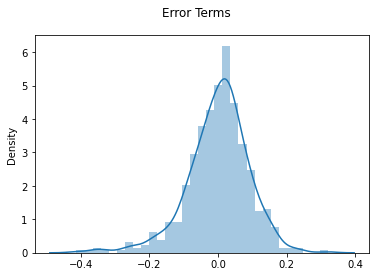

In [89]:
Residue =  y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Residue))
fig.suptitle('Error Terms')                   # X-label

In [90]:
# Here Residuals are normally distributed hence the assumption for Linear Regression is valid

In [91]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [92]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 184 to 189
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            183 non-null    int64  
 1   holiday       183 non-null    int64  
 2   workingday    183 non-null    int64  
 3   temp          183 non-null    float64
 4   atemp         183 non-null    float64
 5   hum           183 non-null    float64
 6   windspeed     183 non-null    float64
 7   season_2      183 non-null    uint8  
 8   season_3      183 non-null    uint8  
 9   season_4      183 non-null    uint8  
 10  mnth_2        183 non-null    uint8  
 11  mnth_3        183 non-null    uint8  
 12  mnth_4        183 non-null    uint8  
 13  mnth_5        183 non-null    uint8  
 14  mnth_6        183 non-null    uint8  
 15  mnth_7        183 non-null    uint8  
 16  mnth_8        183 non-null    uint8  
 17  mnth_9        183 non-null    uint8  
 18  mnth_10       183 non-null  

In [93]:
col1=X_Drop_8.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_drop_7 = sm.add_constant(X_test)
X_test_drop_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 184 to 189
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         183 non-null    float64
 1   yr            183 non-null    int64  
 2   workingday    183 non-null    int64  
 3   temp          183 non-null    float64
 4   windspeed     183 non-null    float64
 5   season_2      183 non-null    uint8  
 6   season_4      183 non-null    uint8  
 7   mnth_9        183 non-null    uint8  
 8   weekday_6     183 non-null    uint8  
 9   weathersit_2  183 non-null    uint8  
 10  weathersit_3  183 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 9.7 KB


In [94]:
y_pred = LR_model.predict(X_test_drop_7)

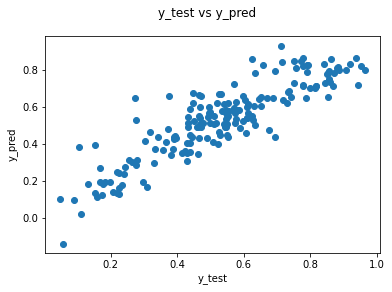

In [95]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred') 
plt.show()

In [96]:
from sklearn.metrics import r2_score
r2_scr  = r2_score(y_test, y_pred)
print(r2_scr)

0.7778880779479713


In [97]:
# Calculation of Adjusted R2
# n is number of rows in X

n = X_test.shape[0]

Prediction = X_test.shape[1]

adj_r2 = 1-(1-r2_scr)*(n-1)/(n-Prediction-1)
adj_r2

0.764974594107737

### Train R2 = 0.837
### Train Adjusted R2 = 0.834

### Test R2 = 0.781
### Test Adjusted R2 = 0.771

We have R-squared test value less than R-squared train value. 

Inference

#### Temperature     : -
=================
A coefficient value of ‘0.560123’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.560123 units.

#### Weather Situation 3   :-
==========================

A coefficient value of ‘-0.288993’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.288993 units.

#### yr
=======
A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units.


The above three variables have more influence in achieveing maximum bike booking. Since its coefficient values are more compared
other values followed by other values.